In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

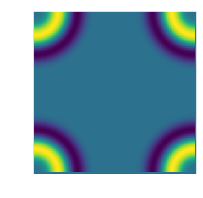

In [6]:
py_directory = "./"
py_directory += "output_travelling_vortex_3d_48/"

pref = 8.61 * 1e4
tref = 300.0
inner = (slice(2,-2),slice(2,-2))

def py_out(pyfile,py_dataset,time):
    return pyfile[str(py_dataset)][str(py_dataset)+time][:]

def get_path(filename):
    return py_directory + filename


def test_case(time):
    path = py_path
    file = h5py.File(path,'r')
    
    # for t in time:
    #     if t < 10:
    #         t_label = '_00' + str(t) + '_' + 'after_full_step'
    #     elif t < 100:
    #         t_label = '_0' + str(t) + '_' + 'after_full_step'
    #     else:
    #         t_label = '_' + str(t) + '_' + 'after_full_step'
    t_label = '_' + str(time[0]) + '_' + 'after_full_step'

#     correction = (py_out(file,'drhoY',time=t_label) / py_out(file,'rho',time=t_label)) * 300
    # correction = py_out(file,'dY',time=t_label) * tref
    
#     temp_perturb = background_temp - correction
    # temp_perturb = correction
#     temp_perturb = background_temp
    rho = py_out(file,'vortz',time=t_label)

    file.close()
    return rho


time = 0.5

py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp_256_256.h5"
py_path = get_path(py_filename)

comp = test_case([time])

plt.figure(figsize=(5,3))
plt.imshow(comp)
plt.show()